# Импорт библиотек

In [132]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

# Настройка CometML
<img src='https://camo.githubusercontent.com/b35adf34bc440ea2ac19bb0d3432f48e26d71ab8e4c256e936b709eec44f5b19/68747470733a2f2f7777772e636f6d65742e6d6c2f696d616765732f6c6f676f5f636f6d65745f6c696768742e706e67' width=500px>

In [133]:
#!pip install comet_ml

In [134]:
from comet_ml import Experiment

In [135]:
# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key='KbQ6FFKTSymuamqfaohaOMadp',
    project_name='medical',
    workspace='vzml',
)

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/vzml/medical/a1187463439c4e3fac80b472414ccb3d
COMET INFO:   Metrics:
COMET INFO:     accuracy : 0.798067440534892
COMET INFO:   Parameters:
COMET INFO:     C                 : 1.0
COMET INFO:     class_weight      : 1
COMET INFO:     clip              : False
COMET INFO:     copy              : True
COMET INFO:     dual              : False
COMET INFO:     feature_range     : (0, 1)
COMET INFO:     fit_intercept     : True
COMET INFO:     intercept_scaling : 1
COMET INFO:     l1_ratio          : 1
COMET INFO:     max_iter          : 100
COMET INFO:     model_type        : logreg
COMET INFO:     multi_class       : auto
COMET INF

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/vzml/medical/e3bcc47478814a5dbf400eeac9174e8b



# Загрузка данных

In [136]:
import os

os.chdir(r'C:\Users\VEZem\Desktop\new\LearnPandas\data')
df = pd.read_csv('./KaggleV2-May-2016.csv')

In [137]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Визуализация

### Распределение числовых признаков

In [138]:
df.hist(figsize=(16,14));
#логируем гистограмму
experiment.log_figure(figure=plt)

{'web': 'https://www.comet.com/api/image/download?imageId=a15bb063cf004388a509464f8eb4aa09&experimentKey=e3bcc47478814a5dbf400eeac9174e8b',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=a15bb063cf004388a509464f8eb4aa09&experimentKey=e3bcc47478814a5dbf400eeac9174e8b',
 'imageId': 'a15bb063cf004388a509464f8eb4aa09'}

*Проанализируем число людей каждого возраста*

In [ ]:
print("Уникальные значения в `Age` => {}".format(df.Age.unique()))

Уникальные значения в `Age` => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [ ]:
# Удалим аномальные значения
df = df[(df.Age >= 0) & (df.Age <= 110)]
df.Age.value_counts()

Age
0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: count, Length: 102, dtype: int64

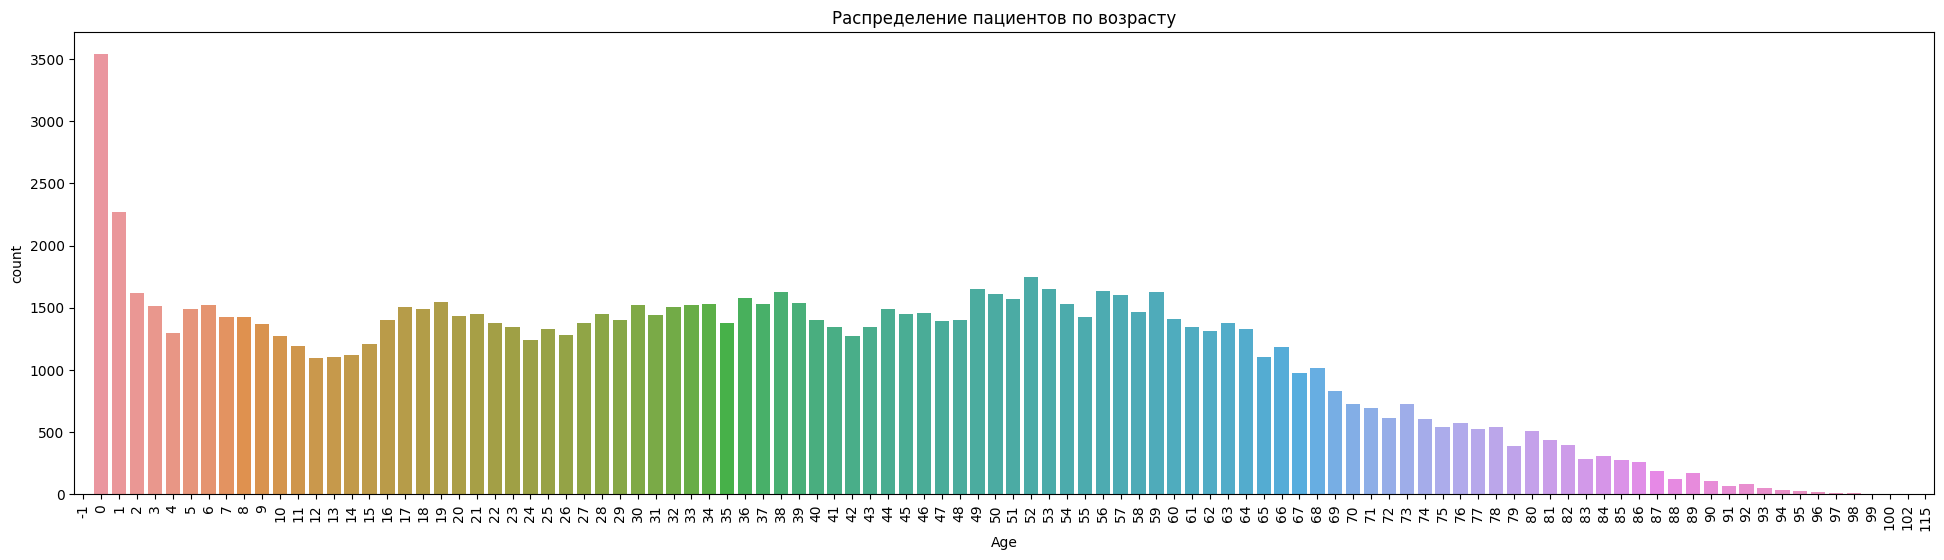

In [ ]:
plt.figure(figsize=(24,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("Распределение пациентов по возрасту")
experiment.log_figure(figure=plt)
plt.show()

<Axes: >

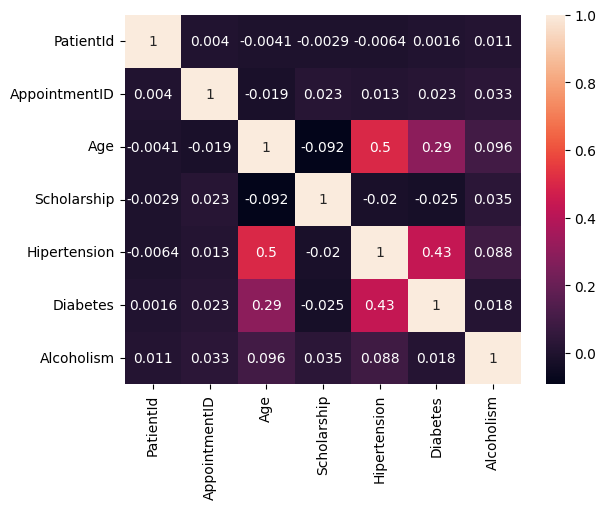

In [ ]:
numeric_data = df[["PatientId", "AppointmentID","Age","Scholarship","Hipertension","Diabetes","Alcoholism"]]
sns.heatmap(numeric_data.corr(), annot = True)

# Придет ли пациент на назначенный приием? 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Кодировка категориальных признаков

In [ ]:
categorical_columns_names = ['Gender', 'Neighbourhood']

In [ ]:
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

In [ ]:
encoded_columns.drop(['AppointmentID', 'PatientId', 'ScheduledDay', 'AppointmentDay', 'No-show'], axis=1, inplace = True)

In [ ]:
encoded_columns.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_F,Gender_M,Neighbourhood_AEROPORTO,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,62,0,1,0,0,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,56,0,0,0,0,0,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,62,0,0,0,0,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,8,0,0,0,0,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,56,0,1,1,0,0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y = df['No-show']

In [ ]:
y

0         No
1         No
2         No
3         No
4         No
          ..
110522    No
110523    No
110524    No
110525    No
110526    No
Name: No-show, Length: 110527, dtype: object

In [ ]:
y = y.replace({'No': 0, 'Yes': 1})

In [ ]:
y.value_counts(True)

No-show
0    0.798067
1    0.201933
Name: proportion, dtype: float64

## Шкалирование данных

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(encoded_columns)

In [ ]:
print(X.shape)

(110527, 90)


# Модель (этот раздел будет подробно изучен далее в курсе)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Инициализация модели

In [ ]:
logreg = LogisticRegression()

In [ ]:
random_state = 42

### Обучение модели

In [ ]:
logreg.fit(X, y)

c:\Users\VEZem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Логирование параметров обучения

In [ ]:
params={"random_state":random_state,
        "model_type":"logreg"
}

In [ ]:
experiment.log_parameters(params)

### Предсказания модели

In [ ]:
y_pred = logreg.predict(X)

### Анализ модели

In [ ]:
accuracy = accuracy_score(y, y_pred)

print("Доля правильных ответов: {:6.3f}".format(accuracy))

Доля правильных ответов:  0.798


# Логирование метрик

In [ ]:
metrics = {"accuracy":accuracy}

In [ ]:
experiment.log_metrics(metrics)

In [ ]:
experiment.log_confusion_matrix(y.tolist(), y_pred.tolist())

{'web': 'https://www.comet.com/api/asset/download?assetId=61174687c83a4eff9725e7f66f19ee70&experimentKey=a1187463439c4e3fac80b472414ccb3d',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=61174687c83a4eff9725e7f66f19ee70&experimentKey=a1187463439c4e3fac80b472414ccb3d',
 'assetId': '61174687c83a4eff9725e7f66f19ee70'}

In [ ]:
experiment.display()

In [ ]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/vzml/medical/74d1d5f9165e43aab67382da43fdf58c
COMET INFO:   Metrics:
COMET INFO:     accuracy : 0.7980836221170637
COMET INFO:   Parameters:
COMET INFO:     C                 : 1.0
COMET INFO:     class_weight      : 1
COMET INFO:     clip              : False
COMET INFO:     copy              : True


COMET INFO:     dual              : False
COMET INFO:     feature_range     : (0, 1)
COMET INFO:     fit_intercept     : True
COMET INFO:     intercept_scaling : 1
COMET INFO:     l1_ratio          : 1
COMET INFO:     max_iter          : 100
COMET INFO:     model_type        : logreg
COMET INFO:     multi_class       : auto
COMET INFO:     n_jobs            : 1
COMET INFO:     penalty           : l2
COMET INFO:     random_state      : 42
COMET INFO:     solver            : lbfgs
COMET INFO:     tol               : 0.0001
COMET INFO:     verbose           : 0
COMET INFO:     warm_start        : False
COMET INFO:   Uploads:
COMET INFO:     confusion-matrix         : 1
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 2
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (15.03 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1

# Домашнее задание

Визуализируйте корреляцию между числовыми признаками, использованными для обучения модели и залогируйте изображение в Comet.

В качестве ответа приложите обновленный ноутбук.

*Форма оценки ментором:*

1) Проведена визуализация корреляции между 7 числовыми признаками, использованными для обучения модели - 5 баллов

2) Произведено логирование графика в CometMl - 10 баллов

